In [ ]:
import pandas as pd
pd.set_option('display.precision',3)
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn import set_config
set_config(display='text') #estimators will be dispalyed as text not diagram

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


In [ ]:
crabs_data = pd.read_csv('crabs.csv')
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal lobe', 'RW':'Rear Width','CL':'Carapace Midline', 'CW':'Maximum Width','BD':'Body depth'})
crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

In [ ]:
crabs_data.describe(include='all')

,species,sex,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth
count,200,200,200.000,200.000,200.000,200.000,200.000,200.000
unique,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Blue,Male,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,25.500,15.583,12.738,32.105,36.415,14.030
std,NaN,NaN,14.467,3.495,2.573,7.119,7.872,3.425
min,NaN,NaN,1.000,7.200,6.500,14.700,17.100,6.100
25%,NaN,NaN,13.000,12.900,11.000,27.275,31.500,11.400
50%,NaN,NaN,25.500,15.550,12.800,32.100,36.800,13.900
75%,NaN,NaN,38.000,18.050,14.300,37.225,42.000,16.600


In [ ]:
crabs_data.columns


Index(['species', 'sex', 'index', 'Frontal lobe', 'Rear Width',
       'Carapace Midline', 'Maximum Width', 'Body depth'],
      dtype='object')

In [ ]:
crabs_data['class'] = crabs_data.species + crabs_data.sex
crabs_data['class'].value_counts()

,count
class,
BlueMale,50
BlueFemale,50
OrangeMale,50
OrangeFemale,50


In [ ]:
data_columns = ['Frontal lobe','Rear Width','Carapace Midline','Maximum Width','Body depth']
crabs_data[data_columns].describe()

,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth
count,200.000,200.000,200.000,200.000,200.000
mean,15.583,12.738,32.105,36.415,14.030
std,3.495,2.573,7.119,7.872,3.425
min,7.200,6.500,14.700,17.100,6.100
25%,12.900,11.000,27.275,31.500,11.400
50%,15.550,12.800,32.100,36.800,13.900
75%,18.050,14.300,37.225,42.000,16.600
max,23.100,20.200,47.600,54.600,21.600


<Axes: >

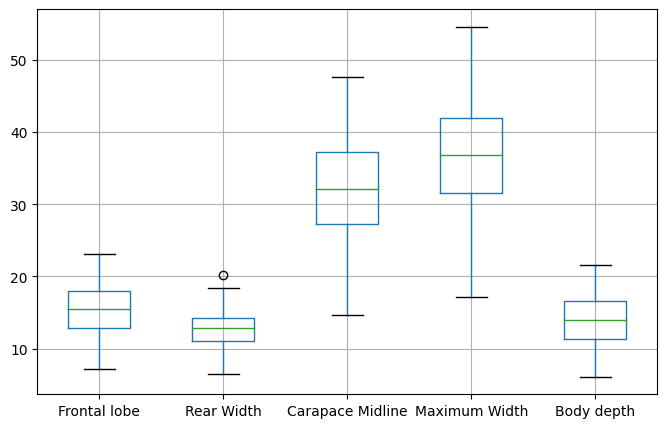

In [ ]:
fig, ax=plt.subplots(figsize=(8,5))
crabs_data[data_columns].boxplot()

<Axes: title={'center': 'Frontal lobe'}, xlabel='class'>

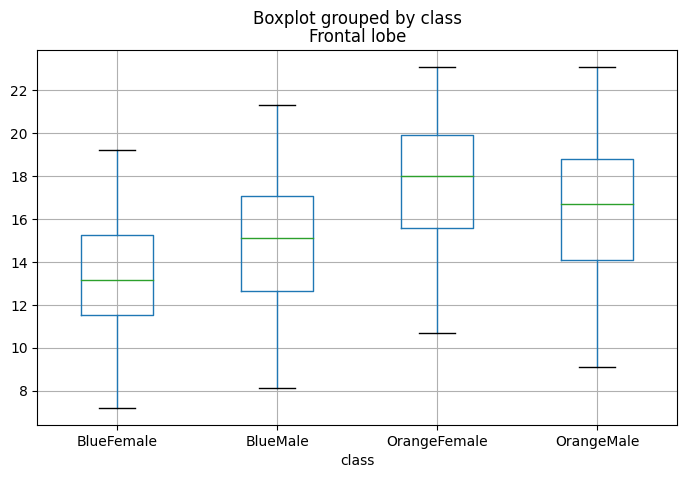

In [ ]:
crabs_data.boxplot(column ='Frontal lobe', by='class', figsize=(8,5))

<Axes: title={'center': 'Rear Width'}, xlabel='class'>

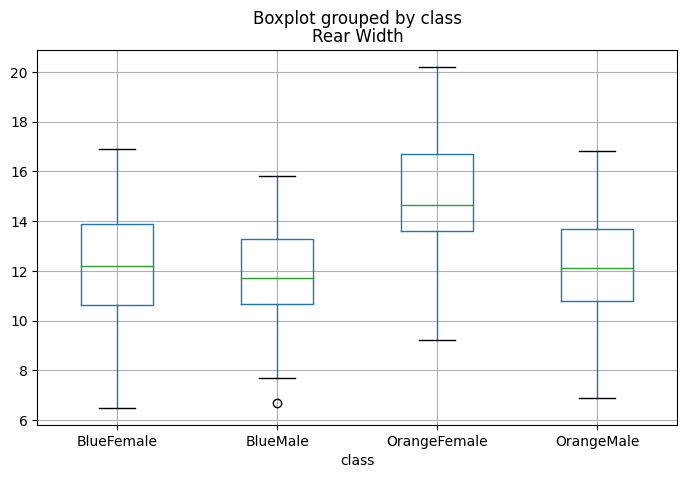

In [ ]:
crabs_data.boxplot(column ='Rear Width', by='class', figsize=(8,5))

<Axes: title={'center': 'Carapace Midline'}, xlabel='class'>

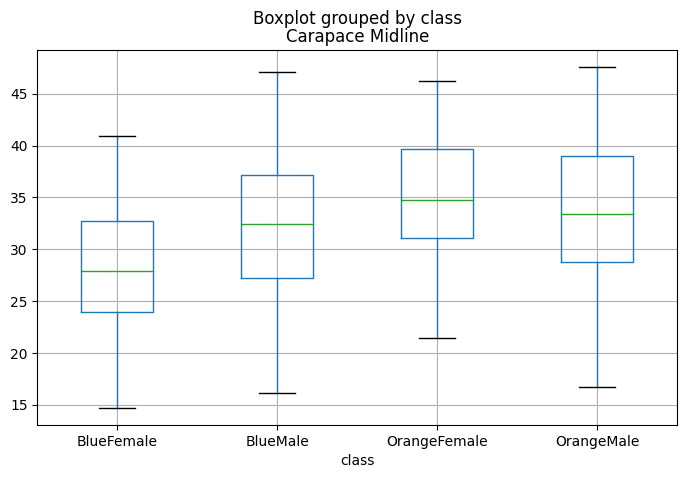

In [ ]:
crabs_data.boxplot(column ='Carapace Midline', by='class', figsize=(8,5))

<Axes: title={'center': 'Maximum Width'}, xlabel='class'>

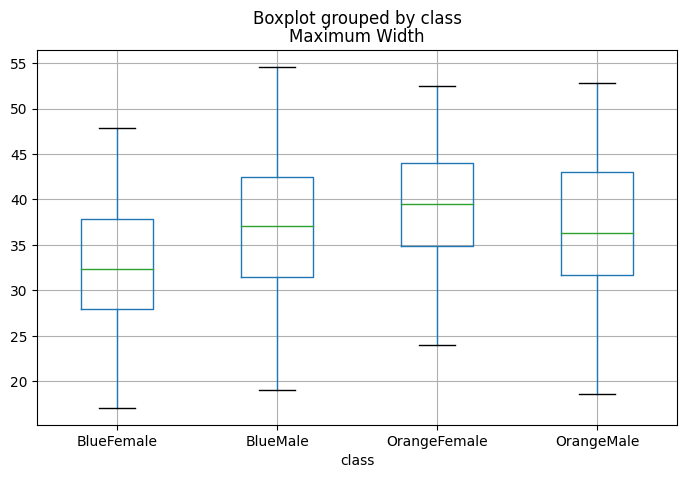

In [ ]:
crabs_data.boxplot(column ='Maximum Width', by='class', figsize=(8,5))

<Axes: title={'center': 'Body depth'}, xlabel='class'>

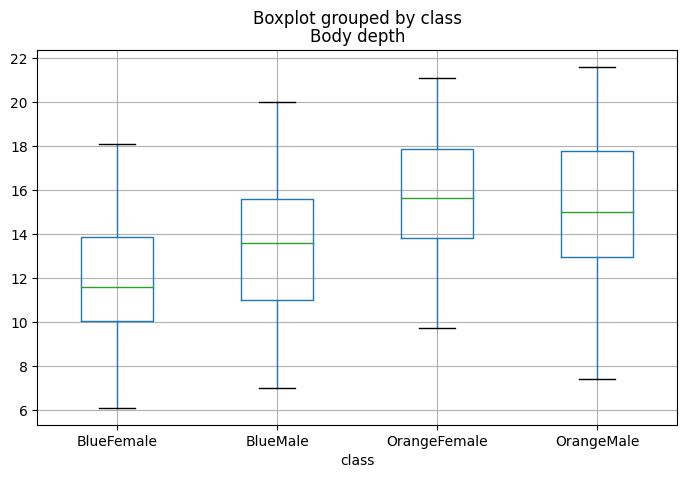

In [ ]:
crabs_data.boxplot(column ='Body depth', by='class', figsize=(8,5))

array([[<Axes: title={'center': 'Frontal lobe'}>,
        <Axes: title={'center': 'Rear Width'}>,
        <Axes: title={'center': 'Carapace Midline'}>,
        <Axes: title={'center': 'Maximum Width'}>,
        <Axes: title={'center': 'Body depth'}>, <Axes: >]], dtype=object)

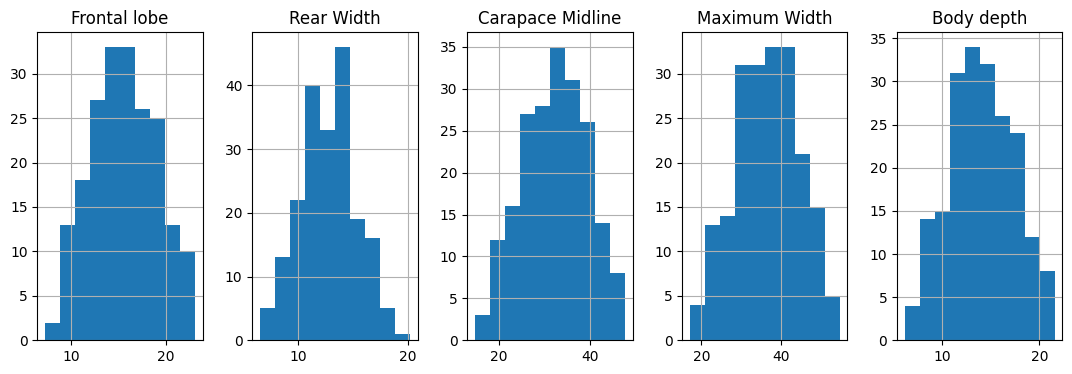

In [ ]:
crabs_data[data_columns].hist(figsize=(16,4),layout=(1,6))

<Axes: xlabel='Frontal lobe', ylabel='Count'>

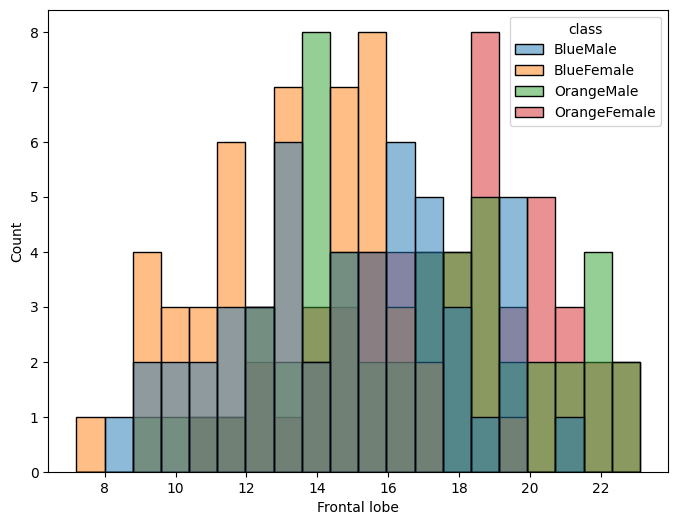

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data, x='Frontal lobe', hue='class', bins=20)

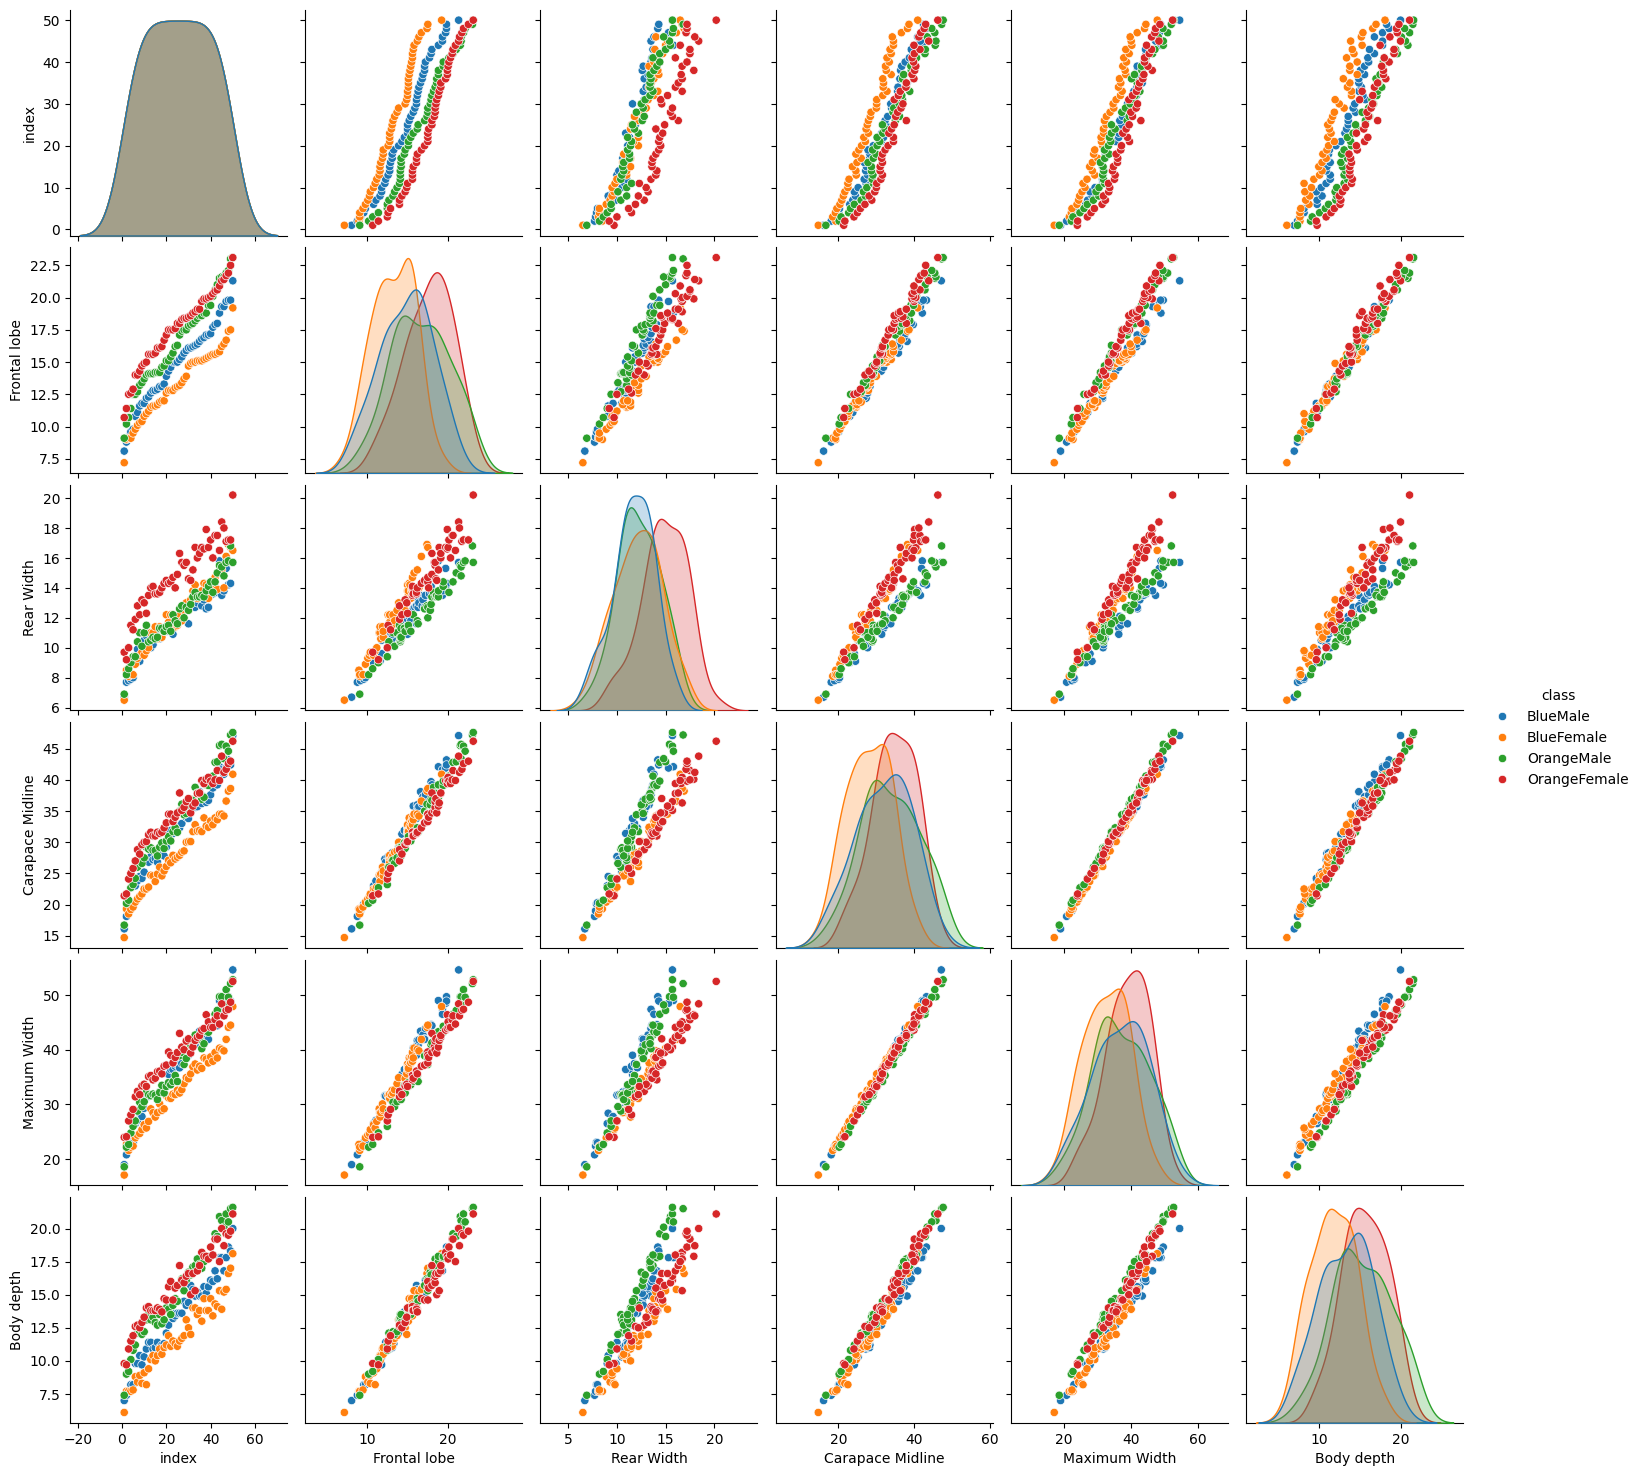

In [ ]:
sns.pairplot(crabs_data, hue='class')

In [ ]:
crabs_standardized = crabs_data.copy()
crabs_standardized[data_columns]=StandardScaler().fit_transform(crabs_data[data_columns])
crabs_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,2.550e+01,14.467,1.000,13.000,2.550e+01,38.000,50.000
Frontal lobe,200.0,-7.105e-17,1.003,-2.404,-0.770,-9.465e-03,0.708,2.156
Rear Width,200.0,6.040e-16,1.003,-2.430,-0.677,2.396e-02,0.608,2.907
Carapace Midline,200.0,1.066e-16,1.003,-2.451,-0.680,-7.745e-04,0.721,2.182
Maximum Width,200.0,-4.974e-16,1.003,-2.460,-0.626,4.909e-02,0.711,2.316
Body depth,200.0,0.000e+00,1.003,-2.321,-0.770,-3.820e-02,0.752,2.216


In [ ]:
myPCA = PCA().fit(crabs_standardized[data_columns])
print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())


[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]
[0.95776696 0.988104   0.99743059 0.99965766 1.        ]


In [ ]:
myPCA.singular_values_

array([30.94781021,  5.50790717,  3.05394742,  1.49233757,  0.58509446])

Text(0.5, 1.0, 'Scree plot')

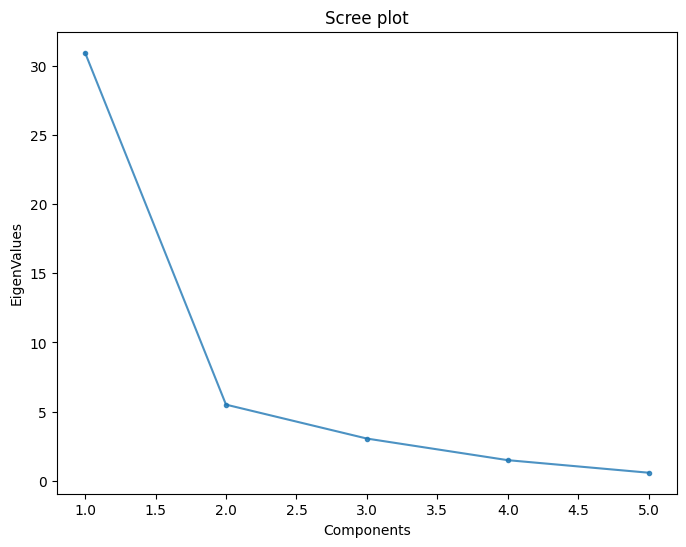

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.singular_values_)+1), myPCA.singular_values_, alpha=0.8, marker='.')
y_label=plt.ylabel('EigenValues')
x_label=plt.xlabel('Components')
plt.title('Scree plot')



Text(0.5, 1.0, 'Percentage of variance explained by component')

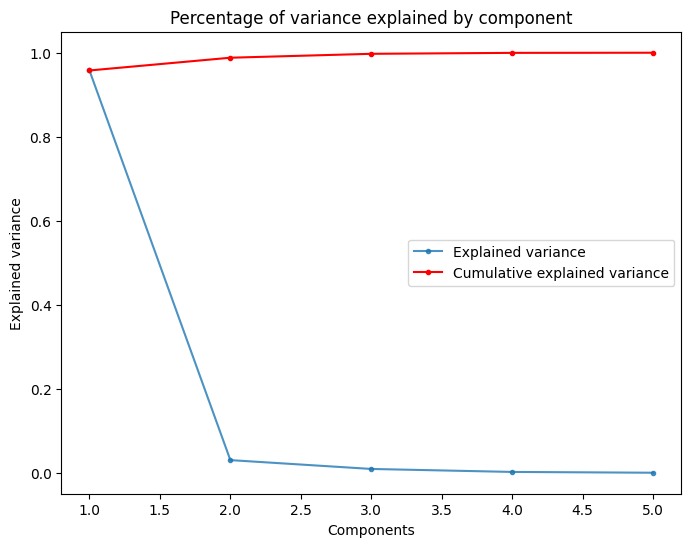

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.explained_variance_ratio_)+1),myPCA.explained_variance_ratio_,alpha=0.8,marker='.', label='Explained variance')
y_label = plt.ylabel('Explained variance')
x_label = plt.xlabel('Components')
plt.plot(range(1,len(myPCA.explained_variance_ratio_)+1),np.cumsum(myPCA.explained_variance_ratio_),c='r',marker='.', label='Cumulative explained variance')
plt.legend()
plt.title('Percentage of variance explained by component')

<Axes: >

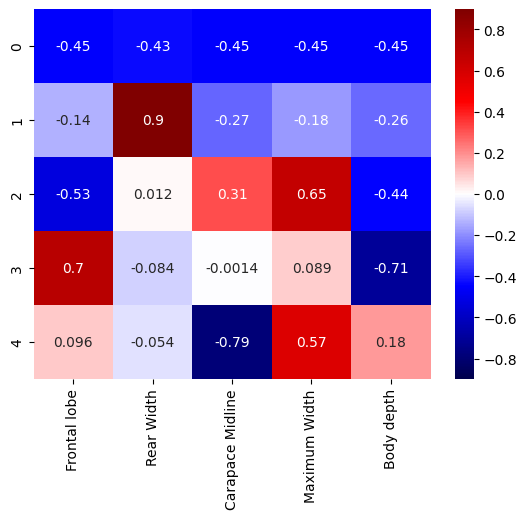

In [ ]:
sns.heatmap(myPCA.components_,cmap='seismic', xticklabels=list(crabs_data.columns[3:-1]),
            vmin=-np.max(np.abs(myPCA.components_)), vmax=np.max(np.abs(myPCA.components_)),
            annot=True)


In [ ]:
crabs_data.head()

,species,sex,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


###PCA: Transformation and visualization

In [ ]:
transformed = myPCA.transform(crabs_standardized[data_columns])
crabs_standardized[['PC1','PC2','PC3']] = transformed[:,:3]


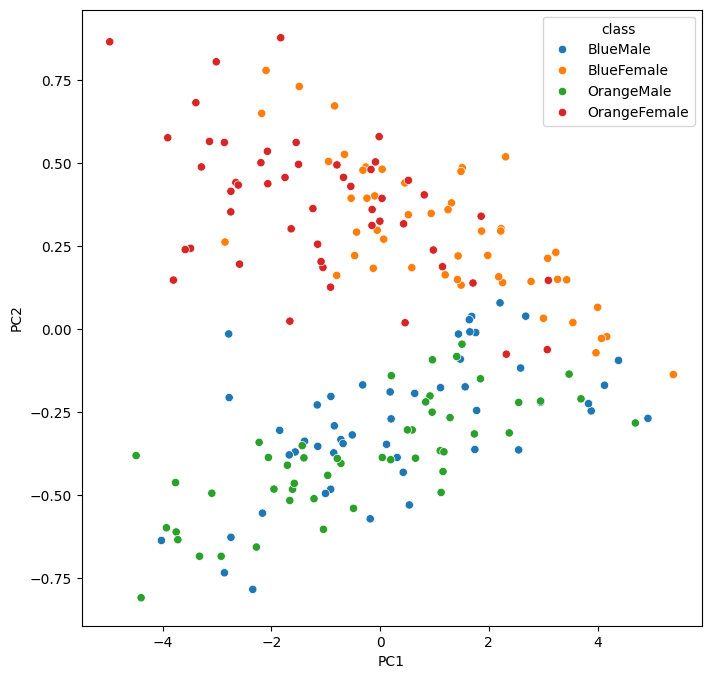

In [ ]:
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', hue='class', data = crabs_standardized)


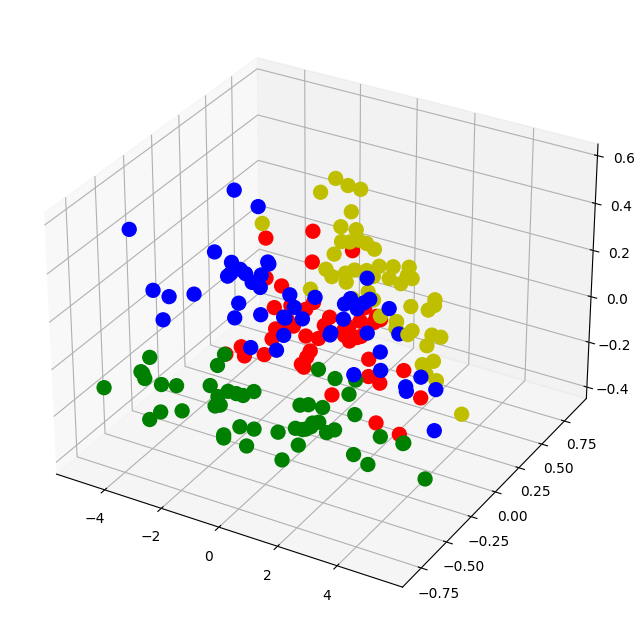

In [ ]:
color_crabs = {'BlueFemale':'y', 'BlueMale':'b', 'OrangeFemale':'r', 'OrangeMale':'g'}
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(crabs_standardized.PC1, crabs_standardized.PC2, zs=crabs_standardized.PC3,
            depthshade=False, c=crabs_data['class'].apply(lambda x: color_crabs[x]),s=100)